In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

<h3>Preprocessing</h3>

In [3]:
imbd_data = pd.read_csv('data/IMBD.csv')
imbd_data

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN
...,...,...,...,...,...,...,...,...,...
129886,Chocatos,"Short, Drama, Family",10 min,NaN,NaN,NaN,Add a Plot\n,NaN,['Diego Al Romero']
129887,Song of the Caballero,"Drama, Western",73 min,NaN,NaN,"['Ken Maynard, ', 'Doris Hill, ', 'Francis For...",After El Lobo robs Don Jose he gives one of th...,NaN,['Harry Joe Brown']
129888,The Flaming Forties,Western,60 min,NaN,NaN,"['Harry Carey, ', 'William Bailey, ', 'Jacquel...",A young cowhand befriends a disreputable gambl...,NaN,['Tom Forman']
129889,The Girl and the Sheriff,"Short, Western",NaN,NaN,NaN,"['Betty Keller, ', 'George Field, ', 'Lee Mora...","Bob Warren, sheriff of Grass County, Cal., and...",NaN,['Al Christie']


In [4]:
imbd_data['certificate'].unique()

array(['A', 'UA', 'PG-13', 'UA 16+', nan, 'R', 'Not Rated', '16+', '18',
       '18+', 'U', 'PG', 'UA 13+', '16', '7', 'U/A', '13', '15+', '12+',
       'U/A 16+', '(Banned)', 'UA 7+', '12', 'All', 'G', 'Unrated',
       'NC-17', 'Approved', 'M/PG', 'GP', '15', '7+', 'U/A 7+', 'TV-14',
       'M', '3+', '13+', 'Passed', 'TV-PG', 'X'], dtype=object)

In [5]:
imbd_data.drop(columns = ['stars', 'runtime', 'director', 'certificate'], inplace = True)
imbd_data

,movie,genre,rating,description,votes
0,The Witcher,"Action, Adventure, Drama",8.1,"Geralt of Rivia, a solitary monster hunter, st...","5,39,085"
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",8.0,Ethan Hunt and his IMF team must track down a ...,"1,06,759"
2,Sound of Freedom,"Action, Biography, Drama",7.9,The incredible true story of a former governme...,"41,808"
3,Secret Invasion,"Action, Adventure, Drama",6.2,Fury and Talos try to stop the Skrulls who hav...,"40,536"
4,Special Ops: Lioness,"Action, Drama, Thriller",7.5,Joe attempts to balance her personal and profe...,"3,203"
...,...,...,...,...,...
129886,Chocatos,"Short, Drama, Family",NaN,Add a Plot\n,NaN
129887,Song of the Caballero,"Drama, Western",NaN,After El Lobo robs Don Jose he gives one of th...,NaN
129888,The Flaming Forties,Western,NaN,A young cowhand befriends a disreputable gambl...,NaN
129889,The Girl and the Sheriff,"Short, Western",NaN,"Bob Warren, sheriff of Grass County, Cal., and...",NaN


In [6]:
imbd_data['genre'].unique()

array(['Action, Adventure, Drama            ',
       'Action, Adventure, Thriller            ',
       'Action, Biography, Drama            ', ...,
       'Western, Short, Music            ',
       'Drama, Western, Musical            ',
       'Sport, Western            '], dtype=object)

In [7]:
imbd_data.columns

Index(['movie', 'genre', 'rating', 'description', 'votes'], dtype='object')

In [8]:
imbd_data.isna().any()

movie          False
genre          False
rating          True
description    False
votes           True
dtype: bool

In [9]:
imbd_data.dropna(inplace = True)
imbd_data.shape

(114381, 5)

In [10]:
imbd_data.columns

Index(['movie', 'genre', 'rating', 'description', 'votes'], dtype='object')

In [11]:
imbd_data.dtypes

movie           object
genre           object
rating         float64
description     object
votes           object
dtype: object

In [12]:
imbd_data = imbd_data[imbd_data['votes'].map(lambda text: text[0]) != '$']
imbd_data['votes'] = imbd_data['votes'].apply(lambda number: int(''.join([char for char in number.split(',') if char != ''])))

imbd_data = imbd_data[imbd_data['description'].map(len) > 30]

imbd_data

,movie,genre,rating,description,votes
0,The Witcher,"Action, Adventure, Drama",8.1,"Geralt of Rivia, a solitary monster hunter, st...",539085
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",8.0,Ethan Hunt and his IMF team must track down a ...,106759
2,Sound of Freedom,"Action, Biography, Drama",7.9,The incredible true story of a former governme...,41808
3,Secret Invasion,"Action, Adventure, Drama",6.2,Fury and Talos try to stop the Skrulls who hav...,40536
4,Special Ops: Lioness,"Action, Drama, Thriller",7.5,Joe attempts to balance her personal and profe...,3203
...,...,...,...,...,...
129864,Lariats and Six-Shooters,Western,5.5,A gang of jewel smugglers swears to take reven...,27
129866,The Bulleteers,"Short, Western",3.4,When a quirky but deadly outlaw returns to tow...,34
129869,The Goddess of Sagebrush Gulch,"Short, Romance, Western",6.0,"The Goddess, the prettiest and best natured gi...",43
129872,Arizona Manhunt,"Drama, Western",5.6,Female gang boss poses as welfare worker come ...,15


In [13]:
imbd_data.sort_values(by = 'votes', ascending = False)
imbd_data = imbd_data.drop_duplicates(subset = 'movie')
imbd_data

,movie,genre,rating,description,votes
0,The Witcher,"Action, Adventure, Drama",8.1,"Geralt of Rivia, a solitary monster hunter, st...",539085
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",8.0,Ethan Hunt and his IMF team must track down a ...,106759
2,Sound of Freedom,"Action, Biography, Drama",7.9,The incredible true story of a former governme...,41808
3,Secret Invasion,"Action, Adventure, Drama",6.2,Fury and Talos try to stop the Skrulls who hav...,40536
4,Special Ops: Lioness,"Action, Drama, Thriller",7.5,Joe attempts to balance her personal and profe...,3203
...,...,...,...,...,...
129864,Lariats and Six-Shooters,Western,5.5,A gang of jewel smugglers swears to take reven...,27
129866,The Bulleteers,"Short, Western",3.4,When a quirky but deadly outlaw returns to tow...,34
129869,The Goddess of Sagebrush Gulch,"Short, Romance, Western",6.0,"The Goddess, the prettiest and best natured gi...",43
129872,Arizona Manhunt,"Drama, Western",5.6,Female gang boss poses as welfare worker come ...,15


<h3>Visualizations</h3>

In [14]:
top_genres = imbd_data['genre'].value_counts().nlargest(10)
filtered_data = imbd_data[imbd_data['genre'].isin(top_genres.index)]

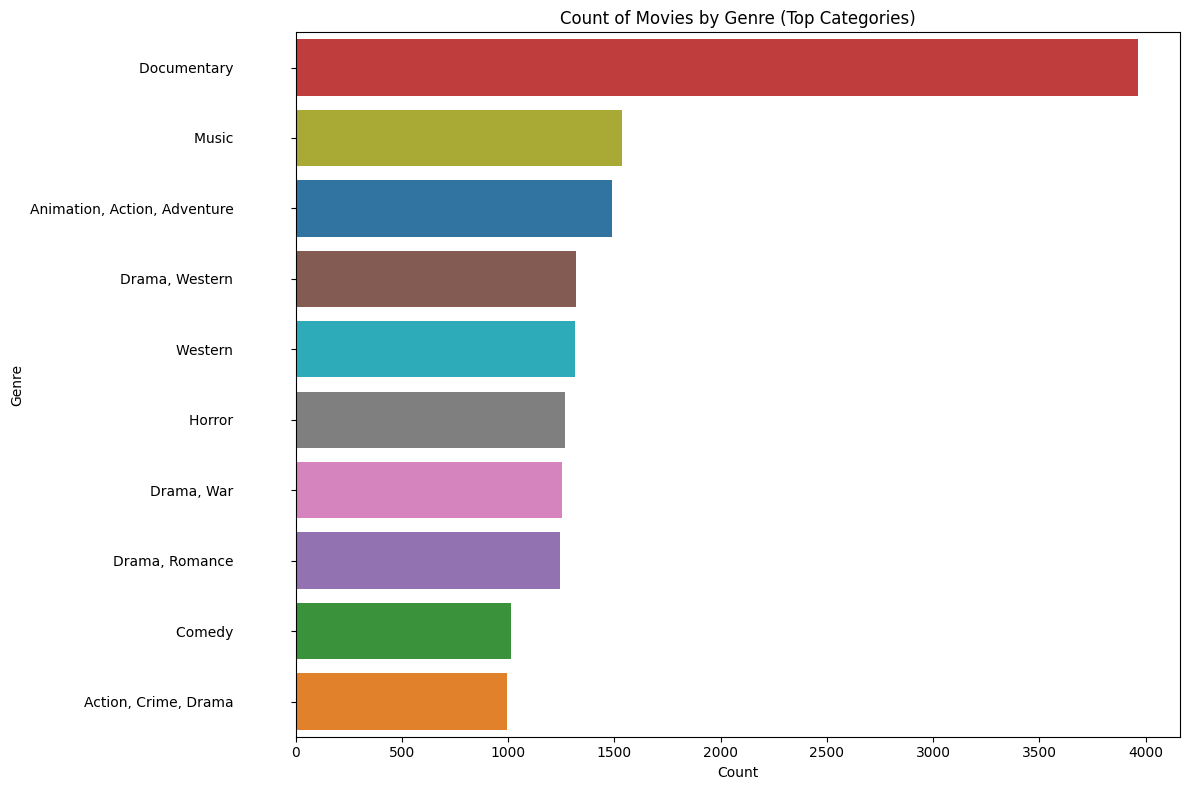

In [15]:
plt.figure(figsize=(12, 8)) 
sns.countplot(y='genre', data=filtered_data, order=filtered_data['genre'].value_counts().index, hue = 'genre')
plt.title('Count of Movies by Genre (Top Categories)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [16]:
fig = px.bar(filtered_data, y='genre', 
             title='Count of Movies by Genre (Top Categories)',
             labels={'genre': 'Genre', 'index': 'Count'},
             orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

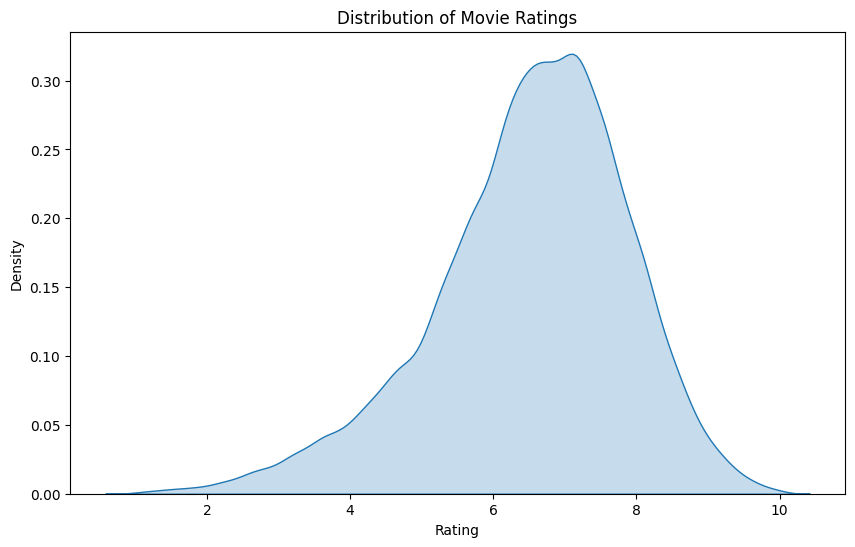

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=imbd_data, x='rating', fill=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

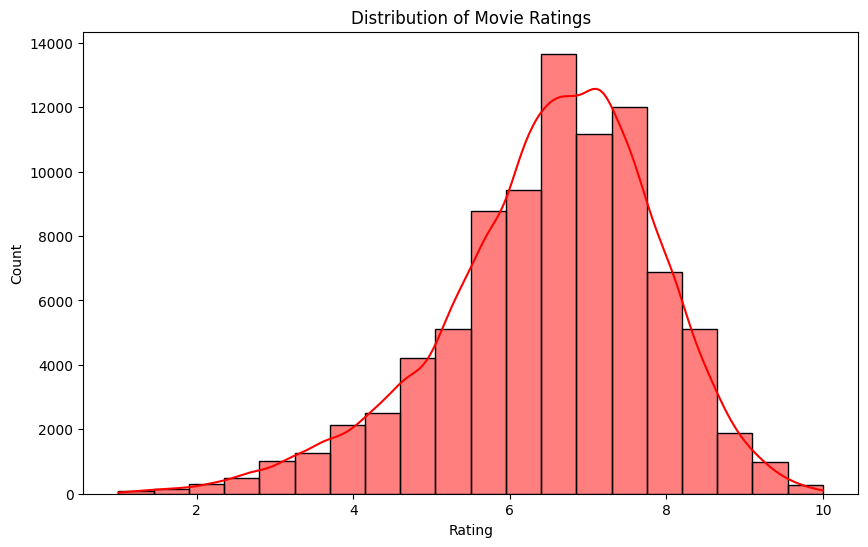

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=imbd_data, x='rating', bins=20, kde=True, color='red')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<h3>Modeling</h3>

<p>Experiment 1: TF-IDF Vectorization</p>

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

In [20]:
imbd_data['cleaned_desc'] = imbd_data['description'].apply(lambda text: text.lower())
imbd_data['cleaned_desc'] = imbd_data['cleaned_desc'].apply(lambda text: text.translate(str.maketrans('', '', punctuation)))

words = stopwords.words('english')
imbd_data['cleaned_desc'] = imbd_data['cleaned_desc'].apply(lambda text: ' '.join([word for word in text.split() if word not in words]))

lemmetizer = WordNetLemmatizer()
imbd_data['cleaned_desc'] = imbd_data['cleaned_desc'].apply(lambda text: ' '.join([lemmetizer.lemmatize(word) for word in text.split()]))

imbd_data

,movie,genre,rating,description,votes,cleaned_desc
0,The Witcher,"Action, Adventure, Drama",8.1,"Geralt of Rivia, a solitary monster hunter, st...",539085,geralt rivia solitary monster hunter struggle ...
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",8.0,Ethan Hunt and his IMF team must track down a ...,106759,ethan hunt imf team must track dangerous weapo...
2,Sound of Freedom,"Action, Biography, Drama",7.9,The incredible true story of a former governme...,41808,incredible true story former government agent ...
3,Secret Invasion,"Action, Adventure, Drama",6.2,Fury and Talos try to stop the Skrulls who hav...,40536,fury talos try stop skrulls infiltrated highes...
4,Special Ops: Lioness,"Action, Drama, Thriller",7.5,Joe attempts to balance her personal and profe...,3203,joe attempt balance personal professional life...
...,...,...,...,...,...,...
129864,Lariats and Six-Shooters,Western,5.5,A gang of jewel smugglers swears to take reven...,27,gang jewel smuggler swears take revenge deputy...
129866,The Bulleteers,"Short, Western",3.4,When a quirky but deadly outlaw returns to tow...,34,quirky deadly outlaw return town masked hero g...
129869,The Goddess of Sagebrush Gulch,"Short, Romance, Western",6.0,"The Goddess, the prettiest and best natured gi...",43,goddess prettiest best natured girl ever grace...
129872,Arizona Manhunt,"Drama, Western",5.6,Female gang boss poses as welfare worker come ...,15,female gang bos pose welfare worker come take ...


In [21]:
# Remove data - too large to compute all similarities 
sorted_data = imbd_data.sort_values(by = 'votes', ascending = False)
top_shows = sorted_data.head(15000)
top_shows = top_shows.reset_index()
top_shows

,index,movie,genre,rating,description,votes,cleaned_desc
0,12,Game of Thrones,"Action, Adventure, Drama",9.2,Nine noble families fight for control over the...,2186960,nine noble family fight control land westeros ...
1,39411,Breaking Bad,"Crime, Drama, Thriller",9.5,A chemistry teacher diagnosed with inoperable ...,2012112,chemistry teacher diagnosed inoperable lung ca...
2,53784,Stranger Things,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",1261852,young boy disappears mother police chief frien...
3,53780,The Walking Dead,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,1038321,sheriff deputy rick grime wake coma learn worl...
4,32433,Friends,"Comedy, Romance",8.9,Follows the personal and professional lives of...,1037376,follows personal professional life six twenty ...
...,...,...,...,...,...,...,...
14995,4998,Armed Response,"Action, Horror, Thriller",3.7,"A remote facility, built as a prison with a se...",2773,remote facility built prison secret super lie ...
14996,7627,Lost City Raiders,"Action, Adventure, Sci-Fi",4.0,"The year is 2048, and global warming has flood...",2773,year 2048 global warming flooded much earth la...
14997,59221,"Tsatsiki, morsan och polisen","Drama, Family",6.0,"Little Tsatsiki, son of a single mother in Swe...",2773,little tsatsiki son single mother sweden never...
14998,62874,Lo,"Comedy, Fantasy, Horror",6.4,A man uses a demon to save his girlfriend but ...,2773,man us demon save girlfriend demon nefarious plan


In [22]:
vectorizer = TfidfVectorizer()

text = np.array(top_shows['cleaned_desc'])
text = vectorizer.fit_transform(text)

cosine_tfidf_text = cosine_similarity(text, text)
cosine_tfidf_data = pd.DataFrame(cosine_tfidf_text)

In [29]:
def recommend_shows_with_tfidf(name: str, num_recommendations: int):
    try:
        index = top_shows.index[top_shows['movie'] == name][0]
    except IndexError:
        not_found = True
        while not_found:
            name = input(f'{name} not found in database. Enter another: ')
            try:
                index = top_shows.index[top_shows['movie'] == name][0]
                if index:
                    break
            except IndexError:
                continue
    indices_recommended = cosine_tfidf_data.loc[index].sort_values(ascending = False).index.tolist()[1:num_recommendations + 1]
    movies_recommended = top_shows['movie'].loc[indices_recommended].values
    print(f'------ Recommendations for {name}: -----')
    for idx, movie in enumerate(movies_recommended):
        num_votes = top_shows.loc[top_shows['movie'] == movie]['votes'].item()
        desc = top_shows.loc[top_shows['movie'] == movie]['description'].item()
        genre = top_shows.loc[top_shows['movie'] == movie]['genre'].item()
        print(f'{idx + 1}: {movie}')
        print(f'\tDescription: {desc}')
        print(f'\tGenre: {genre}')
        print(f'\tVotes: {num_votes}')

In [35]:
user_choice = input('Enter a tv show or movie you like: ')
num_recommendations = int(input('Enter number of recommendations you would like: '))
recommend_shows_with_tfidf(user_choice, num_recommendations)

------ Recommendations for Jujutsu Kaisen: -----
1: Lo
	Description: A man uses a demon to save his girlfriend but the demon has a nefarious plan.
	Genre: Comedy, Fantasy, Horror            
	Votes: 2773
2: New Amsterdam
	Description: A New York homicide detective is cursed with immortality.
	Genre: Crime, Drama, Sci-Fi            
	Votes: 7317
3: Shaman Kingu
	Description: SHAMAN KING follows the adventures of a 13-year-old shaman and his teammate a samurai warrior spirit, who traverse the world fighting evil spirits and misguided shamans on their journey to be the next Shaman King.
	Genre: Animation, Action, Adventure            
	Votes: 6257
4: Dororo
	Description: A father in pursuit of power gives parts of his new-born son to a host of demons. Years later, the son battles those demons to regain what is rightfully his.
	Genre: Animation, Action, Adventure            
	Votes: 16993
5: The Grudge
	Description: A house is cursed by a vengeful ghost that dooms those who enter it with a

<p>Experiment 2: BERT Sentence Transformer</p>

In [25]:
from sentence_transformers import SentenceTransformer

In [31]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embedding = model.encode(np.array(top_shows['cleaned_desc']), show_progress_bar = True)

X = np.array(embedding)
cosine_bert_data = cosine_similarity(X, X)
cosine_bert_data = pd.DataFrame(cosine_bert_data)

Batches: 100%|██████████| 469/469 [00:46<00:00, 10.18it/s]


In [32]:
def recommend_shows_with_bert(name: str, num_recommendations: int):
    try:
        index = top_shows.index[top_shows['movie'] == name][0]
    except IndexError:
        not_found = True
        while not_found:
            name = input(f'{name} not found in database. Enter another: ')
            try:
                index = top_shows.index[top_shows['movie'] == name][0]
                if index:
                    break
            except IndexError:
                continue
    indices_recommended = cosine_bert_data.loc[index].sort_values(ascending = False).index.tolist()[1:num_recommendations + 1]
    movies_recommended = top_shows['movie'].loc[indices_recommended].values
    print(f'------ Recommendations for {name}: -----')
    for idx, movie in enumerate(movies_recommended):
        num_votes = top_shows.loc[top_shows['movie'] == movie]['votes'].item()
        desc = top_shows.loc[top_shows['movie'] == movie]['description'].item()
        genre = top_shows.loc[top_shows['movie'] == movie]['genre'].item()
        print(f'{idx + 1}: {movie}')
        print(f'\tDescription: {desc}')
        print(f'\tGenre: {genre}')
        print(f'\tVotes: {num_votes}')

In [34]:
user_choice = input('Enter a movie or tv show you like: ')
num_recommendations = int(input('Enter number of recommendations you would like: '))
recommend_shows_with_bert(user_choice, num_recommendations)

------ Recommendations for Jujutsu Kaisen: -----
1: Dead Before Dawn 3D
	Description: A group of college kids accidentally create, and then unleash, a curse that makes anyone they come into contact with kill themselves and then turn into zombie demons.
	Genre: Adventure, Comedy, Horror            
	Votes: 4177
2: Deathgasm
	Description: Two teenage boys unwittingly summon an ancient evil entity known as The Blind One by delving into black magic while trying to escape their mundane lives.
	Genre: Action, Comedy, Horror            
	Votes: 18530
3: Evilspeak
	Description: An outcast military cadet taps into a way to summon demons and cast spells on his tormentors through his computer.
	Genre: Horror            
	Votes: 4650
4: Trollhunters
	Description: An ordinary boy finds a magic amulet that chooses him to be a Trollhunter, a guardian that defends the world of humans and the secret world of trolls.
	Genre: Animation, Action, Adventure            
	Votes: 18104
5: The Seventh Day
	Desc